In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df_arbres_brut = pd.read_csv("p2-arbres-fr.csv", sep=";")

# 1) 1ère analyse: tronc commun à toutes

In [3]:
df_travail=df_arbres_brut.copy()
df_travail.head(40)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890470,2.315228
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre à miel,Tetradium,daniellii,NaN,37,0,NaN,NaN,48.890504,2.315168
7,99881,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,NaN,NaN,48.876722,2.280222
8,99882,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802008,Sophora,Sophora,japonica,NaN,145,14,A,0.0,48.871990,2.275814
9,99883,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802009,Sophora,Sophora,japonica,NaN,135,10,A,0.0,48.872046,2.275752


In [4]:
# nombre de lignes et de colonnes du df_travail
df_travail.shape

(200137, 18)

<AxesSubplot:ylabel='None'>

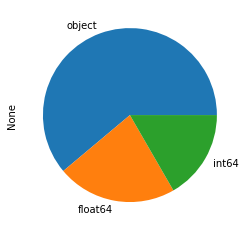

In [5]:
# diagramme circulaire des types de données du df_travail
df_travail.dtypes.value_counts().plot.pie()

<AxesSubplot:>

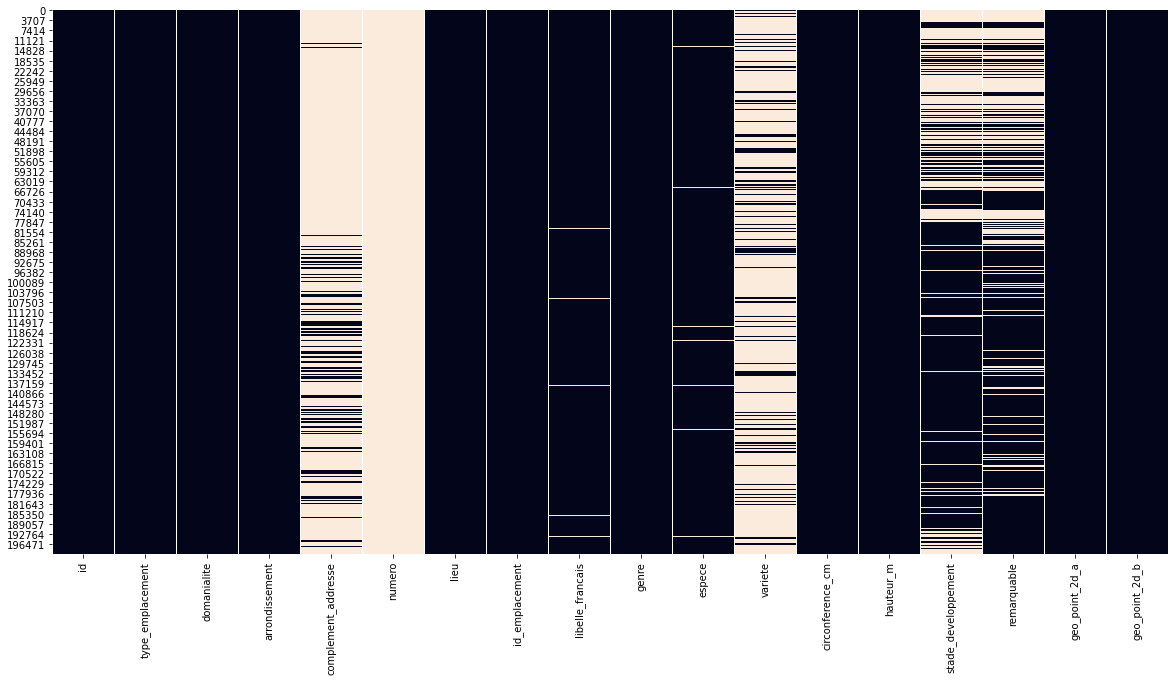

In [6]:
# cartographie des données manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df_travail.isna(), cbar=False)

In [7]:
# Les colonnes de df_travail avec plus de 80% de données manquantes sont retirées et on crée un nouveau dataframe de travail
df_travail2=df_travail[df_travail.columns[(df_travail.isna().sum()/df_travail.shape[0])<0.8]]

<AxesSubplot:>

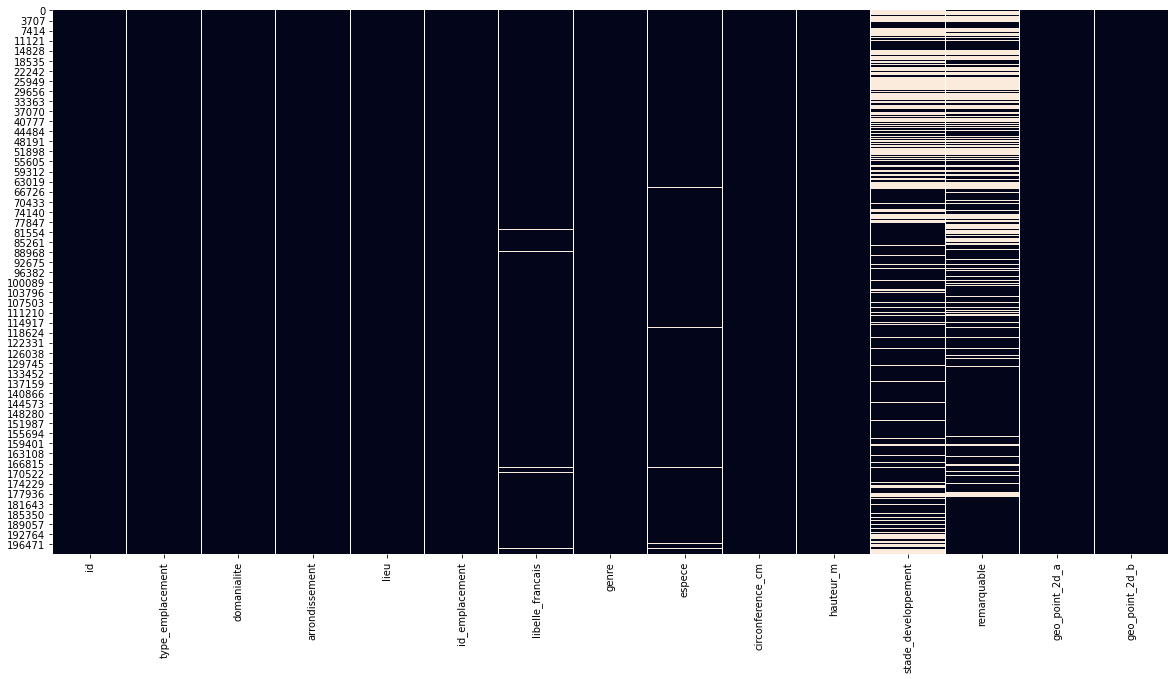

In [8]:
# Vérification des données manquantes du nouveau dataframe df_travail2
plt.figure(figsize=(20,10))
sns.heatmap(df_travail2.isna(), cbar=False)

In [9]:
# La colonne id est retirée car inutile
df_travail2 = df_travail2.drop('id', axis=1)
df_travail2.head()
df_travail2.shape

(200137, 14)

In [10]:
# résumé statistique de df_travail2
df_travail2.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,83.380479,13.110509,0.001343,48.854491,2.348208
std,673.190213,1971.217387,0.036618,0.030234,0.051220
min,0.000000,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,0.000000,48.835021,2.307530
50%,70.000000,8.000000,0.000000,48.854162,2.351095
75%,115.000000,12.000000,0.000000,48.876447,2.386838
max,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [11]:
# On continue avec le nouveau dataframe df_travail3
df_travail3=df_travail2.copy()
# retirer lignes avec circonference  nulle
df_travail3.drop(df_travail3[df_travail3['circonference_cm']==0].index, inplace=True)
# retirer lignes avec diamètre > 450 cm
df_travail3.drop(df_travail3[df_travail3['circonference_cm']>=450].index, inplace=True)
# retirer lignes avec hauteur nulle
df_travail3.drop(df_travail3[df_travail3['hauteur_m']==0].index, inplace=True)
# retirer lignes avec hauteur > 40 m
df_travail3.drop(df_travail3[df_travail3['hauteur_m']>=40].index, inplace=True)

In [12]:
df_travail3.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,159884.000000,159884.000000,127357.000000,159884.000000,159884.000000
mean,92.200070,10.356021,0.001201,48.855828,2.346148
std,57.934553,5.124012,0.034640,0.025864,0.049321
min,1.000000,1.000000,0.000000,48.742290,2.210416
25%,50.000000,6.000000,0.000000,48.836801,2.307588
50%,80.000000,10.000000,0.000000,48.855185,2.348759
75%,125.000000,14.000000,0.000000,48.874128,2.383184
max,449.000000,38.000000,1.000000,48.911485,2.469759


<AxesSubplot:xlabel='circonference_cm', ylabel='hauteur_m'>

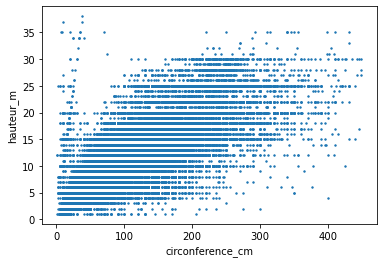

In [13]:
# nuage de points hauteur_m vs.  circonference_cm
df_travail3.plot.scatter('circonference_cm','hauteur_m', s=2)

In [14]:
# On s'interesse désormais aux libellés des arbres (erable, peuplier, maronnier, etc.).
# On ne garde que 3 colonnes: libellé, hauteur et circonférence

# 2) on étudie désormais les arbres selon leur libellé

In [15]:
#on élimine d'abord les colonnes qui nous seront inutiles
df_travail3.drop(columns = ['type_emplacement','domanialite','arrondissement','lieu','id_emplacement','genre','espece','stade_developpement','remarquable','geo_point_2d_a', 'geo_point_2d_b'], inplace = True)

In [16]:
df_travail3.shape

(159884, 3)

In [17]:
df_travail3.head()

,libelle_francais,circonference_cm,hauteur_m
0,Marronnier,20,5
1,If,65,8
2,If,90,10
3,Erable,60,8
7,Platane,260,17


In [18]:
df_travail3['libelle_francais'].isna().value_counts()

False    158527
True       1357
Name: libelle_francais, dtype: int64

In [19]:
df_travail3['circonference_cm'].isna().value_counts()

False    159884
Name: circonference_cm, dtype: int64

In [20]:
df_travail3['hauteur_m'].isna().value_counts()

False    159884
Name: hauteur_m, dtype: int64

#### on a ainsi vérifié (cellules ci-dessus) que ni la circonference ni la hauteur ne comportent des NaN

In [21]:
# on enleve les arbres qui n'ont pas de libellé et on travaille à partir d'une nouvelle copie du dataframe

df_travail4 = df_travail3.copy()

In [22]:
df_travail4.dropna(how = 'any', axis = 0 , inplace = True)

In [23]:
df_travail4.shape

(158527, 3)

### on a donc 158527 arbres "expoitables" portant un libellé, une hauteur et une circonference

In [24]:
#il faut mettre en rapport le libellé avec les 2 paramètres circonférence et hauteur, 
# mais on ne peut prendre qu'une valeur pour ces deux entités, donc on choisit leur moyenne
df_travail5 = df_travail4.groupby(['libelle_francais']).mean()

In [25]:
df_travail5.head()

,circonference_cm,hauteur_m
libelle_francais,,
Abelia,47.500000,5.500000
Abricotier,17.400000,2.314286
Ailante,99.757909,10.546080
Alangium,20.000000,3.000000
Alisier,39.706587,5.586826


In [26]:
df_travail5.shape

(169, 2)

### de près de 160000, nous sommes passés à 169 libellés différents avec la méthode "groupby"

<AxesSubplot:xlabel='hauteur_m', ylabel='circonference_cm'>

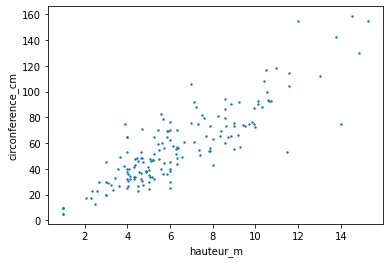

In [27]:
df_travail5.plot.scatter('hauteur_m','circonference_cm',s=2)

## RQ: le graphique ci-dessus est obtenu en calculant les hauteur et circonférence moyennes pour chaque libellé.
## on pourrait, au vu du graphique, imaginer faire de la **régression linéaire**... mais cela sort de notre cadre d'étude.

# 3) Les Arbres Remarquables en eux-mêmes

In [28]:
# on reprend df_travail2 pour créer df_travail6, car df_travail2 contient encore toutes les colonnnes
df_travail6 = df_travail2.copy()

In [29]:
# On reprend avec le nouveau dataframe df_travail6 pour ne garder que les arbres 'non aberrants'
# retirer lignes avec circonference  nulle
df_travail6.drop(df_travail6[df_travail6['circonference_cm']==0].index, inplace=True)
# retirer lignes avec diamètre > 450 cm
df_travail6.drop(df_travail6[df_travail6['circonference_cm']>=450].index, inplace=True)
# retirer lignes avec hauteur nulle
df_travail6.drop(df_travail6[df_travail6['hauteur_m']==0].index, inplace=True)
# retirer lignes avec hauteur > 40 m
df_travail6.drop(df_travail6[df_travail6['hauteur_m']>=40].index, inplace=True)

In [30]:
df_travail6.drop(columns = ['type_emplacement','domanialite','arrondissement','lieu','id_emplacement','genre','espece','stade_developpement','libelle_francais'], inplace = True)

In [31]:
df_travail6['remarquable'].isna().value_counts()

False    127357
True      32527
Name: remarquable, dtype: int64

In [32]:
df_travail6.dropna(how = 'any', axis = 0 , inplace = True)

In [33]:
df_travail6.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,127357.000000,127357.000000,127357.000000,127357.000000,127357.000000
mean,92.095519,10.410829,0.001201,48.854883,2.345944
std,58.096050,5.166550,0.034640,0.025932,0.049151
min,1.000000,1.000000,0.000000,48.754491,2.211263
25%,48.000000,6.000000,0.000000,48.836553,2.308350
50%,80.000000,10.000000,0.000000,48.854222,2.347856
75%,125.000000,14.000000,0.000000,48.873093,2.381312
max,449.000000,35.000000,1.000000,48.911050,2.469759


In [34]:
df_travail6.nunique()

circonference_cm       399
hauteur_m               35
remarquable              2
geo_point_2d_a      127353
geo_point_2d_b      127350
dtype: int64

#### on voit que le paramètres ***remarquable*** ne prend que 2 valeurs => c'est un booléen (0= non, 1=oui)

In [35]:
df_travail.groupby('remarquable').count()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
remarquable,,,,,,,,,,,,,,,,,
0.0,136855,136855,136854,136855,28564,0,136855,136855,135359,136839,135649,24501,136855,136855,120662,136855,136855
1.0,184,184,184,184,134,0,184,184,183,184,184,16,184,184,182,184,184


In [36]:
df_remarquables = df_travail6[df_travail6['remarquable']==1]

In [37]:
df_remarquables.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,153.000000,153.000000,153.0,153.000000,153.000000
mean,245.869281,17.758170,1.0,48.856957,2.331711
std,102.782134,7.204737,0.0,0.019354,0.058938
min,30.000000,3.000000,1.0,48.818389,2.233706
25%,165.000000,12.000000,1.0,48.844888,2.286796
50%,227.000000,17.000000,1.0,48.859169,2.336277
75%,335.000000,24.000000,1.0,48.870406,2.383680
max,449.000000,35.000000,1.0,48.894623,2.464226


Text(0.5, 0, 'circonférence en cm')

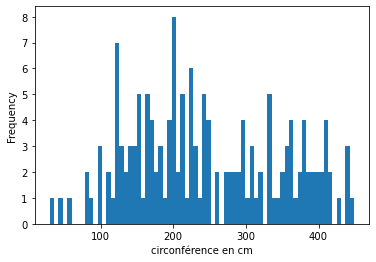

In [38]:
df_remarquables['circonference_cm'].plot.hist(by='circonference_cm', bins=70)
plt.xlabel('circonférence en cm')


Text(0.5, 0, 'hauteur en m')

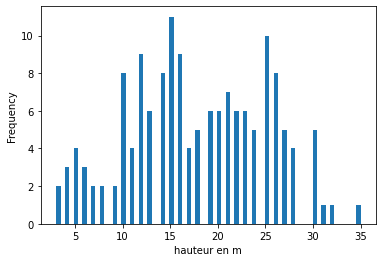

In [39]:
df_remarquables['hauteur_m'].plot.hist(by='hauteur_m', bins=70)
plt.xlabel('hauteur en m')

<AxesSubplot:xlabel='geo_point_2d_a', ylabel='geo_point_2d_b'>

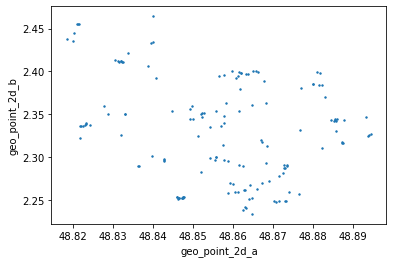

In [40]:
df_remarquables.plot.scatter('geo_point_2d_a','geo_point_2d_b',s=2)

## Rq: les arbres remarquables sont dispersés sur la carte.. et dans tout Paris!